## Should this Marvel Character have Blue Eyes?

#### import libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support


### Data Cleaning and Organizing

In [2]:
df = pd.read_csv('../input/marvel-comics-character-dataset - marvel-wikia-data.csv')
df.head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
0,461528,Bardak,single,bad,straight,dead,1.0,1939.0,Dec.,NaN,brown,male
1,657451,Bends (Masked Raider),single,bad,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male
2,437129,Blackie Ross,single,bad,straight,alive,1.0,1939.0,Dec.,NaN,black,male
3,642971,Bleck,single,neutral,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male
4,437029,Cal Brunder,single,bad,straight,alive,1.0,1939.0,Oct.,NaN,NaN,male


In [3]:
df[df['eyes'] == 'blue'].head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender
76,437867,Diane Carson,public,good,straight,alive,1.0,1940.0,Jan.,blue,blond,female
727,495227,Hercules (Captain America Past Life),secret,good,straight,alive,1.0,1944.0,May.,blue,blond,male
855,708966,Nick Finelli,public,bad,straight,alive,1.0,1945.0,Sep.,blue,black,male
859,505245,Percy Walker,public,good,straight,alive,1.0,1945.0,Jan.,blue,blond,male
885,754718,Arch Murdock,single,bad,straight,alive,1.0,1946.0,Dec.,blue,red,male


In [4]:
len(df[df['eyes'].isnull()])

9767

In [5]:
len(df[df['eyes'].notnull()])

6609

In [6]:
df.groupby(['eyes'])['id'].count()

eyes
amber                10
black               555
black eyeballs        3
blue               1962
brown              1924
compound              1
gold                 14
green               613
grey                 95
hazel                76
magenta               2
multiple              7
no                    7
one eye              21
orange               25
pink                 21
purple               31
red                 508
silver               12
variable             49
violet               11
white               400
yellow              256
yellow eyeballs       6
Name: id, dtype: int64

In [7]:
# code for blue and not blue

In [8]:
df['blue_eyes']= df['eyes']

In [9]:
df['blue_eyes'] = df['blue_eyes'].where(df['blue_eyes'].notnull(), -1)

In [10]:
prediction_df = df[df['blue_eyes'] == -1].copy()
prediction_df.head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender,blue_eyes
0,461528,Bardak,single,bad,straight,dead,1.0,1939.0,Dec.,NaN,brown,male,-1
1,657451,Bends (Masked Raider),single,bad,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male,-1
2,437129,Blackie Ross,single,bad,straight,alive,1.0,1939.0,Dec.,NaN,black,male,-1
3,642971,Bleck,single,neutral,straight,dead,1.0,1939.0,Oct.,NaN,NaN,male,-1
4,437029,Cal Brunder,single,bad,straight,alive,1.0,1939.0,Oct.,NaN,NaN,male,-1


In [ ]:
# Checking for null values below in order to organize the data. 

In [11]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 16375
Data columns (total 13 columns):
id                  9767 non-null int64
name                9767 non-null object
identity            6772 non-null object
alignment           7763 non-null object
orientation         9767 non-null object
status              9764 non-null object
appearances         9021 non-null float64
introduced          9349 non-null float64
introduced_month    9349 non-null object
eyes                0 non-null object
hair                5814 non-null object
gender              9067 non-null object
blue_eyes           9767 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [12]:
prediction_df.drop(columns = ['eyes', 'blue_eyes'], inplace=True)

In [13]:
import random
id_ = random.sample(set(prediction_df.index),1)[0]
data_ = prediction_df.loc[id_]

In [14]:
id_

10836

In [15]:
data_.to_dict()

{'id': 269113,
 'name': 'Madame Death',
 'identity': 'secret',
 'alignment': 'bad',
 'orientation': 'straight',
 'status': 'dead',
 'appearances': 7.0,
 'introduced': 1946.0,
 'introduced_month': 'Dec.',
 'hair': 'black',
 'gender': 'female'}

In [16]:
name = data_.pop('name')

In [17]:
name

'Madame Death'

In [18]:
prediction_df.head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,hair,gender
0,461528,Bardak,single,bad,straight,dead,1.0,1939.0,Dec.,brown,male
1,657451,Bends (Masked Raider),single,bad,straight,dead,1.0,1939.0,Oct.,NaN,male
2,437129,Blackie Ross,single,bad,straight,alive,1.0,1939.0,Dec.,black,male
3,642971,Bleck,single,neutral,straight,dead,1.0,1939.0,Oct.,NaN,male
4,437029,Cal Brunder,single,bad,straight,alive,1.0,1939.0,Oct.,NaN,male


In [19]:
prediction_df.to_csv('prediction_data.csv')

In [20]:
df.drop(prediction_df.index, inplace=True)

In [ ]:
## continue to check for null values. I decide that I'll replace null with -1 to signify incomplete data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 76 to 16373
Data columns (total 13 columns):
id                  6609 non-null int64
name                6609 non-null object
identity            5834 non-null object
alignment           5801 non-null object
orientation         6609 non-null object
status              6609 non-null object
appearances         6259 non-null float64
introduced          6212 non-null float64
introduced_month    6212 non-null object
eyes                6609 non-null object
hair                6298 non-null object
gender              6455 non-null object
blue_eyes           6609 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 722.9+ KB


In [ ]:
## I one-hot encode blues eyes as 0, not blue as 1 and then drop text. 

In [22]:
df['blue_eyes'].where(df['blue_eyes'] == 'blue', 0, inplace=True)

In [23]:
df['blue_eyes'].where(df['blue_eyes'] != 'blue', 1, inplace=True)

In [24]:
df.head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender,blue_eyes
76,437867,Diane Carson,public,good,straight,alive,1.0,1940.0,Jan.,blue,blond,female,1
91,448489,Green Terror (3Xs Foe),secret,bad,straight,alive,1.0,1940.0,Mar.,green,green,male,0
164,441633,Zoor,single,bad,straight,alive,1.0,1940.0,Jul.,red,bald,male,0
165,90942,Ak,single,good,straight,dead,1.0,1941.0,Mar.,one eye,NaN,male,0
188,468107,Doctor Howard,secret,bad,straight,alive,1.0,1941.0,Dec.,black,NaN,male,0


In [25]:
df[df['blue_eyes'] == 1].head()

,id,name,identity,alignment,orientation,status,appearances,introduced,introduced_month,eyes,hair,gender,blue_eyes
76,437867,Diane Carson,public,good,straight,alive,1.0,1940.0,Jan.,blue,blond,female,1
727,495227,Hercules (Captain America Past Life),secret,good,straight,alive,1.0,1944.0,May.,blue,blond,male,1
855,708966,Nick Finelli,public,bad,straight,alive,1.0,1945.0,Sep.,blue,black,male,1
859,505245,Percy Walker,public,good,straight,alive,1.0,1945.0,Jan.,blue,blond,male,1
885,754718,Arch Murdock,single,bad,straight,alive,1.0,1946.0,Dec.,blue,red,male,1


In [26]:
df.drop(columns=['eyes'], inplace=True)

#### One Hot encoding of Features

In [27]:
# distributions and sampling

In [28]:
df['identity'].unique()

array(['public', 'secret', 'single', nan, 'known to authorities'],
      dtype=object)

In [29]:
df.columns

Index(['id', 'name', 'identity', 'alignment', 'orientation', 'status',
       'appearances', 'introduced', 'introduced_month', 'hair', 'gender',
       'blue_eyes'],
      dtype='object')

In [30]:
columns_to_encode = ['identity', 'alignment', 'orientation', 'status',
        'introduced_month',  'hair',
       'gender', ]
         

In [31]:
def encode_map_dict(names):
    counts_map = [(y, x+1) for x, y in enumerate(names) ]
    co_maps = dict(counts_map)
    return(co_maps)

def make_unique_sets_encoding(column, df_f):
    list_feature_list=df_f[column].unique()
    diction_ = encode_map_dict(list_feature_list)
    return encode_map_dict(list_feature_list)

def encode_columns(df_f, columns):
    for x in columns:
        x_name = str(x) + '_num'
        dict_x = make_unique_sets_encoding(x, df_f)
        df_f[x_name]= df_f[x].map(dict_x);
        
        
encode_columns(df, columns_to_encode)


In [32]:
# Predictions work flow
encode_columns(prediction_df, columns_to_encode)
prediction_df.drop(columns=columns_to_encode, inplace=True)

In [ ]:
# more cleaning of null values after encoding. 

In [33]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 16375
Data columns (total 11 columns):
id                      9767 non-null int64
name                    9767 non-null object
appearances             9021 non-null float64
introduced              9349 non-null float64
identity_num            9767 non-null int64
alignment_num           9767 non-null int64
orientation_num         9767 non-null int64
status_num              9767 non-null int64
introduced_month_num    9767 non-null int64
hair_num                9767 non-null int64
gender_num              9767 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.2+ MB


In [34]:
prediction_df['appearances'] = prediction_df['appearances'].where(prediction_df['appearances'].notnull(), -1)
prediction_df['introduced'] = prediction_df['introduced'].where(prediction_df['introduced'].notnull(), -1)
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9767 entries, 0 to 16375
Data columns (total 11 columns):
id                      9767 non-null int64
name                    9767 non-null object
appearances             9767 non-null float64
introduced              9767 non-null float64
identity_num            9767 non-null int64
alignment_num           9767 non-null int64
orientation_num         9767 non-null int64
status_num              9767 non-null int64
introduced_month_num    9767 non-null int64
hair_num                9767 non-null int64
gender_num              9767 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.2+ MB


In [35]:
df.drop(columns=columns_to_encode, inplace=True)

In [36]:
df.head()

,id,name,appearances,introduced,blue_eyes,identity_num,alignment_num,orientation_num,status_num,introduced_month_num,hair_num,gender_num
76,437867,Diane Carson,1.0,1940.0,1,1,1,1,1,1,1,1
91,448489,Green Terror (3Xs Foe),1.0,1940.0,0,2,2,1,1,2,2,2
164,441633,Zoor,1.0,1940.0,0,3,2,1,1,3,3,2
165,90942,Ak,1.0,1941.0,0,3,1,1,2,2,4,2
188,468107,Doctor Howard,1.0,1941.0,0,2,2,1,1,4,4,2


In [37]:
len(set(df['name']))

6608

In [38]:
df.describe()

,id,appearances,introduced,identity_num,alignment_num,orientation_num,status_num,introduced_month_num,hair_num,gender_num
count,6609.000000,6259.000000,6212.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000,6609.000000
mean,244882.017249,35.046174,1989.934321,2.082917,2.057497,1.017854,1.257679,6.796338,5.145408,1.760781
std,255472.488726,148.299852,16.816747,0.940300,0.996373,0.197554,0.437389,3.685295,3.108589,0.579199
min,1025.000000,1.000000,1939.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16052.000000,2.000000,1978.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000
50%,116225.000000,6.000000,1993.000000,2.000000,2.000000,1.000000,1.000000,7.000000,5.000000,2.000000
75%,488902.000000,19.000000,2004.000000,2.000000,3.000000,1.000000,2.000000,10.000000,6.000000,2.000000
max,755108.000000,4043.000000,2013.000000,5.000000,4.000000,6.000000,2.000000,13.000000,22.000000,5.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 76 to 16373
Data columns (total 12 columns):
id                      6609 non-null int64
name                    6609 non-null object
appearances             6259 non-null float64
introduced              6212 non-null float64
blue_eyes               6609 non-null object
identity_num            6609 non-null int64
alignment_num           6609 non-null int64
orientation_num         6609 non-null int64
status_num              6609 non-null int64
introduced_month_num    6609 non-null int64
hair_num                6609 non-null int64
gender_num              6609 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 671.2+ KB


In [40]:
### Getting rid of null values

In [41]:
df['appearances'] = df['appearances'].where(df['appearances'].notnull(), -1)

In [42]:
df['introduced'] = df['introduced'].where(df['introduced'].notnull(), -1)

In [ ]:
# no null values!

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 76 to 16373
Data columns (total 12 columns):
id                      6609 non-null int64
name                    6609 non-null object
appearances             6609 non-null float64
introduced              6609 non-null float64
blue_eyes               6609 non-null object
identity_num            6609 non-null int64
alignment_num           6609 non-null int64
orientation_num         6609 non-null int64
status_num              6609 non-null int64
introduced_month_num    6609 non-null int64
hair_num                6609 non-null int64
gender_num              6609 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 671.2+ KB


In [44]:
names_comics = df['name']
df.drop(columns=['name'], inplace=True)

In [45]:
df.to_csv('blue_eyes_data.csv')

## Training and Testing

In [46]:
# correlation matrices

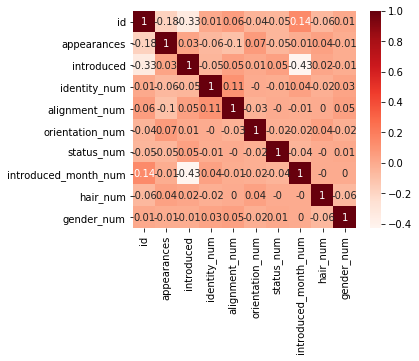

In [47]:
fig1, ax = plt.subplots(1,1, figsize=(5,4))
corr = df.corr().round(2)
ax = sns.heatmap(corr, annot=True,cmap='Reds',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax = ax )

plt.savefig('correlationMatrix')

In [48]:
import random
random.seed(42)

In [49]:
# pick 1962 random samples from NON-Blue entries

In [50]:
random_index = random.sample(set(df[df['blue_eyes']==0].index), 1962)

In [51]:
blue_eyes_index = df[df['blue_eyes']==1].index

In [52]:
training_data = df.loc[random_index].append(df.loc[blue_eyes_index])

In [53]:
target_variable = training_data['blue_eyes']
training_data.drop(columns=['blue_eyes'], inplace=True)

In [54]:
feat_X_train, X_test, feat_y_train,y_test = train_test_split(training_data, target_variable, 
                                                             test_size=0.33, random_state=42)

In [55]:
# baseline ML algorithm

In [56]:
blues_base = y_test.copy()

In [57]:
# supposedly only 17% of people in the world have blue eyes, so we random say %17 of testing has blue eyes
blues_test = random.sample(set(y_test.index), int(len(y_test)*.17))

In [58]:
blues_base.loc[blues_test] = 1

In [59]:
blues_base.loc[~blues_base.isin(blues_test)] = 0

In [60]:
mean_squared_error( y_test, blues_base,)

0.4888030888030888

In [62]:
mean_sq_er_base = mean_squared_error( y_test, blues_base,)

In [63]:
blues_base.unique()

array([0])

In [64]:
y_test = y_test.astype(int)

In [65]:
precision_recall_fscore_support(y_test,blues_base)

/Users/shhuds/env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.51119691, 0.        ]),
 array([1., 0.]),
 array([0.67654573, 0.        ]),
 array([662, 633]))

In [85]:
from sklearn.metrics import f1_score
f1_score(y_test, blues_base, labels=np.unique(blues_base))

0.0

In [66]:
len(blues_base[blues_base == y_test])/(len(blues_base))

0.5111969111969112

In [67]:
len(y_test[blues_base == y_test])/(len(y_test))

0.5111969111969112

### Logistic Regression

In [68]:
feat_y_train = feat_y_train.astype(int)
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(feat_X_train, feat_y_train);


/Users/shhuds/env/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/shhuds/env/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/shhuds/env/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/shhuds/env/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/shhuds/env/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  

In [69]:
blue_pred = clf.predict(X_test);

In [70]:
len(blue_pred[blue_pred==y_test])/len(blue_pred)

0.6077220077220077

In [71]:
mean_squared_error(blue_pred, y_test)

0.39227799227799226

In [72]:
mean_squared_error(y_test, blue_pred)

0.39227799227799226

In [73]:
precision_recall_fscore_support(y_test, blue_pred)

(array([0.61846154, 0.59689922]),
 array([0.60725076, 0.60821485]),
 array([0.61280488, 0.60250391]),
 array([662, 633]))

In [74]:
clf.score(X_test, y_test)

0.6077220077220077

## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(feat_X_train, feat_y_train)

blue_pred_gnb = gnb.predict(X_test)

precision_recall_fscore_support(y_test, blue_pred_gnb)

(array([0.52219532, 0.73214286]),
 array([0.97734139, 0.06477093]),
 array([0.68069437, 0.11901306]),
 array([662, 633]))

In [76]:
mean_squared_error(blue_pred_gnb, y_test)

0.46872586872586874

In [77]:
len(blue_pred_gnb[blue_pred_gnb == y_test])/(len(blue_pred_gnb))

0.5312741312741313

## RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = RandomForestClassifier(n_estimators=100, max_depth=3,
                             random_state=0)
model.fit(feat_X_train, feat_y_train)  
blue_pred = clf.predict(X_test);

In [80]:
precision_recall_fscore_support(y_test, blue_pred_gnb)

(array([0.52219532, 0.73214286]),
 array([0.97734139, 0.06477093]),
 array([0.68069437, 0.11901306]),
 array([662, 633]))

In [81]:
mean_squared_error(blue_pred, y_test)

0.39227799227799226

In [82]:
len(blue_pred[blue_pred == y_test])/(len(blue_pred))

0.6077220077220077

In [83]:
# test various ML for best RSME or ROC_AUC 

# pickle the model

In [ ]:
# Random Forest model
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# pick best ML algorithm and code for deployment

In [ ]:
# flask and dockerize code for a fun web app or combine with other code for a fun API